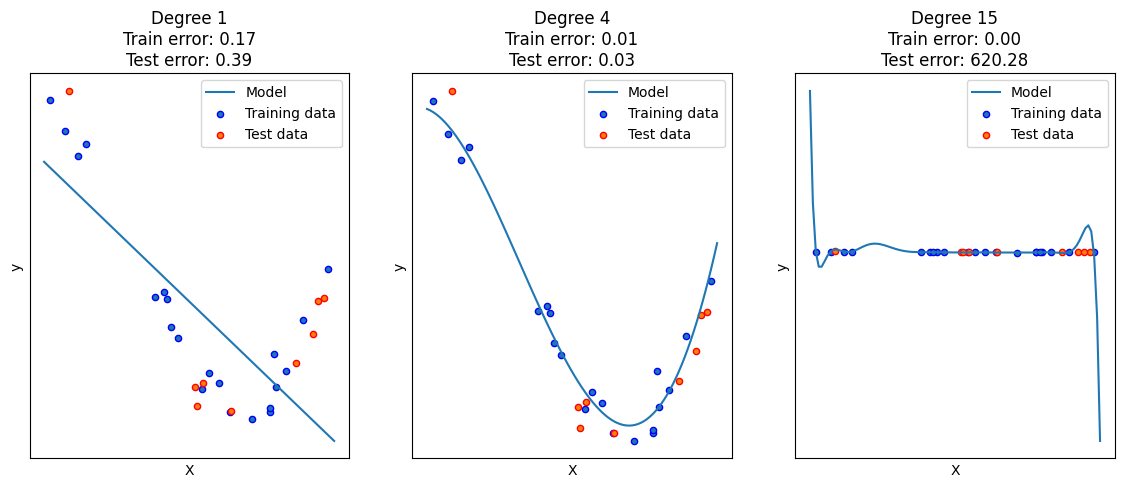

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set the random seed for consistency
np.random.seed(0)

# Define the true function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Generate synthetic data
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Degrees of the polynomial to be tested
degrees = [1, 4, 15]

# Create a figure for plotting
plt.figure(figsize=(14, 5))

# Iterate over different polynomial degrees
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Create a pipeline that includes polynomial feature creation and linear regression
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Predict using the model
    y_train_pred = pipeline.predict(X_train[:, np.newaxis])
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])

    # Compute errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot results
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training data")
    plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Degree {degrees[i]}\nTrain error: {train_error:.2f}\nTest error: {test_error:.2f}")
    plt.legend(loc="best")

# Show the plot
plt.show()
